<a href="https://colab.research.google.com/github/nestorjuarezR/Data_Science/blob/main/playlist_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [1]:
pip install spotipy --upgrade

Requirement already up-to-date: spotipy in /usr/local/lib/python3.6/dist-packages (2.16.1)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import spotipy 
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyClientCredentials

import warnings
warnings.filterwarnings('ignore')

# Conexión a Spotify

In [3]:
auth_manager = SpotifyClientCredentials(client_id='tu_id',
                                        client_secret='tu_secret')

In [5]:
sp = spotipy.Spotify(auth_manager=auth_manager)
playlist_info = 'spotify:playlist:64wCfuQ6rbIVvw0oo1AcFQ'    #Defino la playlista 

In [6]:
playlist = sp.playlist(playlist_info)

In [7]:
#Obtengo un listado con el ID de cada cancion en la playlist

track_ids = []

for item in playlist['tracks']['items']:
  track = item['track']
  track_ids.append(track['id'])

In [8]:
#Obtengo datos de interes de cada cancion

info = []

for i in track_ids:
  track_info = sp.track(i)
  feature_info = sp.audio_features(i)

  #Informacion de la cancion
  name = track_info['name']
  album = track_info['album']['name']
  artist = track_info['album']['artists'][0]['name']
  release_date = track_info['album']['release_date']
  length = track_info['duration_ms']
  popularity = track_info['popularity']
  link = track_info['external_urls']

  #Analisis de la cancion
  id = feature_info[0]['id']
  acousticness = feature_info[0]['acousticness']
  danceability = feature_info[0]['danceability']
  energy = feature_info[0]['energy']
  liveness = feature_info[0]['liveness']
  loudness = feature_info[0]['loudness']
  speechiness = feature_info[0]['speechiness']

  final_info = [id, name, album, artist, release_date, length, popularity,
                 link, acousticness, danceability, energy, liveness, loudness, speechiness]

  info.append(final_info)                 
  

In [9]:
#Convierto a DataFrame
data = pd.DataFrame(info, columns=['id', 'name', 'album', 'artist', 'release_date', 'length', 'popularity',
                 'link', 'acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'speechiness'])

#Análisis

In [10]:
data.head(2)

,id,name,album,artist,release_date,length,popularity,link,acousticness,danceability,energy,liveness,loudness,speechiness
0,5fLOkcGJ6fGNyOGPlG07cK,Culpable Tu,Culpable Tu,Alta Consigna,2016-08-08,231760,0,{'spotify': 'https://open.spotify.com/track/5f...,0.675,0.508,0.361,0.147,-7.538,0.0286
1,658OMPqTG1ASncKCnhsGOl,Así Quería Mirarte,Así Quería Mirarte,Jovanny Cadena Y Su Estilo Privado,2018-10-26,217283,0,{'spotify': 'https://open.spotify.com/track/65...,0.692,0.706,0.695,0.130,-2.922,0.0316


Text(0.5, 1.0, 'Artista por Frecuencia de aparicion')

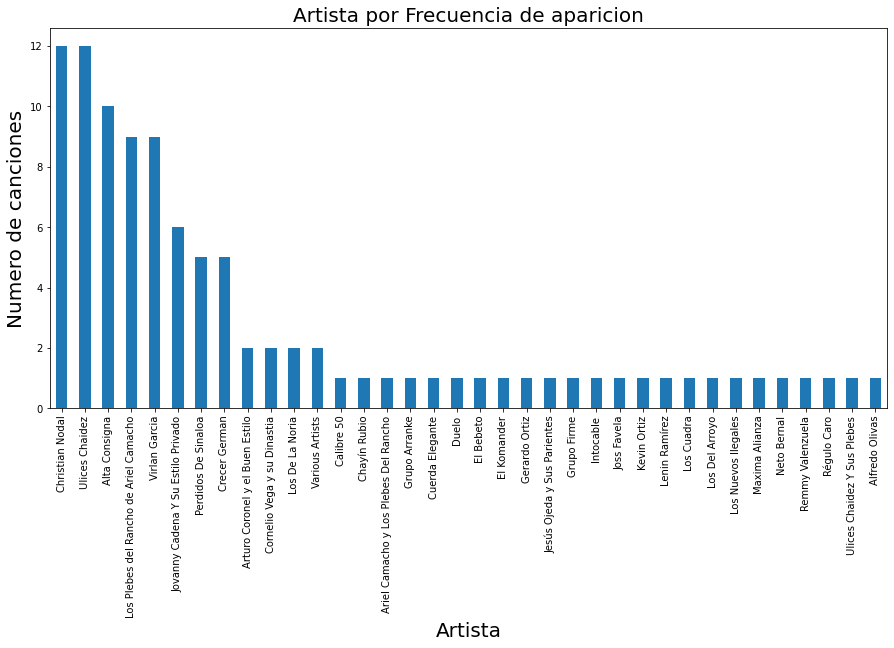

In [11]:
fig = plt.figure(figsize = (15,7))
data.groupby('artist')['name'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Artista', fontsize = 20)
plt.ylabel('Numero de canciones', fontsize = 20)
plt.title('Artista por Frecuencia de aparicion', fontsize = 20)

Text(0.5, 1.0, 'Popularidad de Canciones')

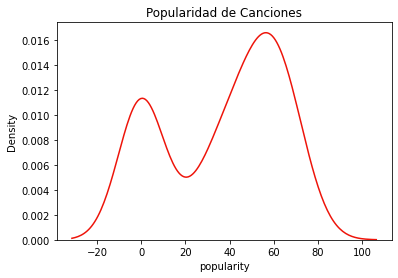

In [12]:
sns.kdeplot(data['popularity'],
            color='#EE140A')
plt.title('Popularidad de Canciones')

In [13]:
populares_full = data.sort_values(by='popularity', ascending=False).head(10)
print('Canciones más populares de la playlist\n')
for i in populares_full.name:
  print('->', i)

Canciones más populares de la playlist

-> De Los Besos Que Te Di
-> Adiós Amor
-> Ya Me Enteré
-> No Te Contaron Mal
-> Seremos
-> Te Fallé
-> Probablemente
-> A Través Del Vaso
-> Siempre Te Voy A Querer
-> Me Dejé Llevar


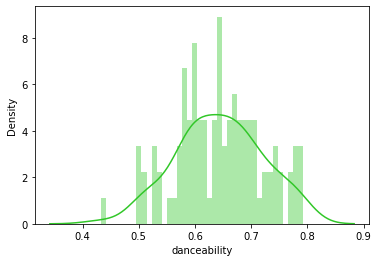

In [14]:
sns.distplot(data.danceability,
             bins=40,
             color='#31C728')

In [15]:
danceability_full = data.sort_values(by='danceability', ascending=False).head(10)
print('Canciones más bailables de la playlist\n')
for i in danceability_full.name:
  print('->', i)

Canciones más bailables de la playlist

-> A Lo Que Voy
-> Lo Que Te Amo
-> Quién Te Entiende
-> Déjame Decirle
-> Ojalá
-> Siempre Te Voy A Querer
-> No Me Hubiera Enamorado
-> Quiero Reintentarlo
-> De Nuevo De Cero
-> Arrodillate


Text(0.5, 1.0, 'Loudness de Canciones')

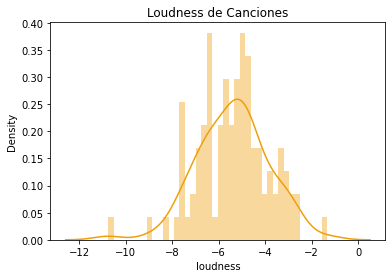

In [16]:
sns.distplot(data.loudness,
             bins=40,
             color='#EE9F0A')
plt.title('Loudness de Canciones')

Text(0.5, 1.0, 'Energia de Canciones')

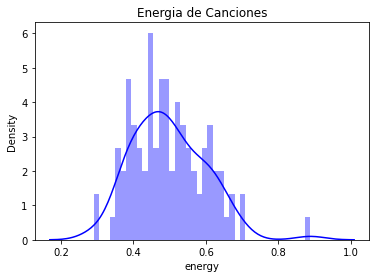

In [17]:
sns.distplot(data.energy,
             bins=40,
             color='blue')
plt.title('Energia de Canciones')

In [18]:
energy_full = data.sort_values(by='energy', ascending=False).head(10)
print('Canciones con mas energia de la playlist\n')
for i in energy_full.name:
  print('->', i)

Canciones con mas energia de la playlist

-> Fue un Error Amarte
-> Así Quería Mirarte
-> A Través Del Vaso
-> Tu Soledad Y La Mía
-> En Definitiva
-> Invítame
-> Apoco
-> Loco Enamorado
-> Ya Me Enteré
-> No Te Vallas


Text(0.5, 1.0, 'Liveness de Canciones')

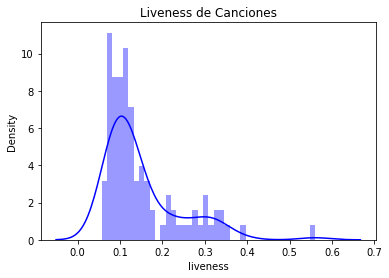

In [19]:
sns.distplot(data.liveness,
             bins=40,
             color='blue')
plt.title('Liveness de Canciones')

In [20]:
liveness_full = data.sort_values(by='liveness', ascending=True).head(10)
print('Canciones mas tristes  de la playlist\n')
for i in liveness_full.name:
  print('->', i)

Canciones mas tristes  de la playlist

-> Ojalá
-> Qué Caro Estoy Pagando
-> De Los Besos Que Te Di
-> Te Voy a Olvidar
-> En Donde Esta Tu Amor
-> Que La Quieran (Que La Cuiden)
-> No Lo Hice Bien
-> No La Hagas Sufrir
-> ¿Quién Se Cree Tu Recuerdo?
-> El Amor De Mi Vida


In [21]:
#Artistas con canciones más bailables
by_danceability = pd.DataFrame(data.groupby('artist')['danceability'].mean())
by_danceability.sort_values(by=['danceability'], ascending=False).head(5)

,danceability
artist,
Calibre 50,0.775
Ariel Camacho y Los Plebes Del Rancho,0.751
Joss Favela,0.741
Kevin Ortiz,0.720
Intocable,0.704


In [22]:
#Artistas con mas energia en sus canciones
by_energy = pd.DataFrame(data.groupby('artist')['energy'].mean())
by_energy.sort_values(by=['energy'], ascending=False).head(5)

,energy
artist,
Cornelio Vega y su Dinastia,0.748
Grupo Arranke,0.695
Intocable,0.671
Alfredo Olivas,0.669
Remmy Valenzuela,0.645


In [23]:
#Artistas con canciones mas tristes
by_liveness = pd.DataFrame(data.groupby('artist')['liveness'].mean())
by_liveness.sort_values(by=['liveness'], ascending=True).head(5)

,liveness
artist,
Neto Bernal,0.07470
Kevin Ortiz,0.07650
El Komander,0.07900
Perdidos De Sinaloa,0.08364
Los Nuevos Ilegales,0.08420


In [24]:
#Artistas con canciones mas populares
by_popularity = pd.DataFrame(data.groupby('artist')['popularity'].mean())
by_popularity.sort_values(by=['popularity'], ascending=False).head(5)

,popularity
artist,
Chayín Rubio,72.0
El Bebeto,68.0
Grupo Arranke,68.0
Calibre 50,67.0
Alfredo Olivas,66.0


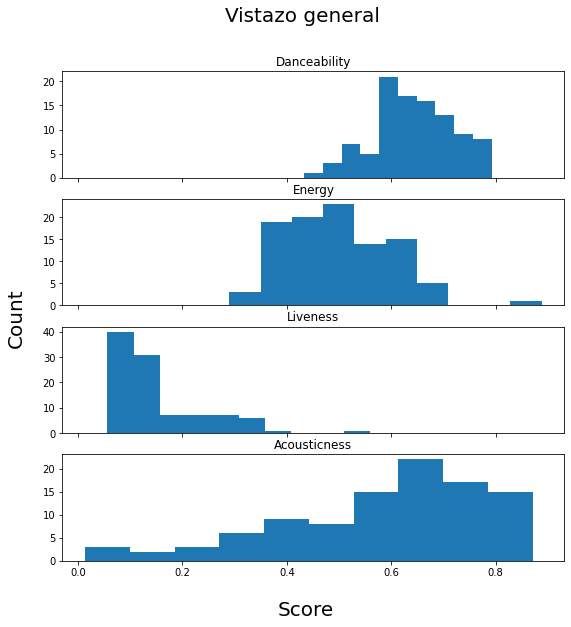

In [25]:
fig, axs = plt.subplots(4, 1, figsize=(9, 9), sharex=True)
fig.text(0.5, 0.04, 'Score', ha='center',size=20)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical',size=20)
axs[0].hist(data['danceability'])
axs[0].set_title('Danceability')
axs[1].hist(data['energy'])
axs[1].set_title('Energy')
axs[2].hist(data['liveness'])
axs[2].set_title('Liveness')
axs[3].hist(data['acousticness'])
axs[3].set_title('Acousticness')
fig.suptitle('Vistazo general ',size=20)
plt.show()

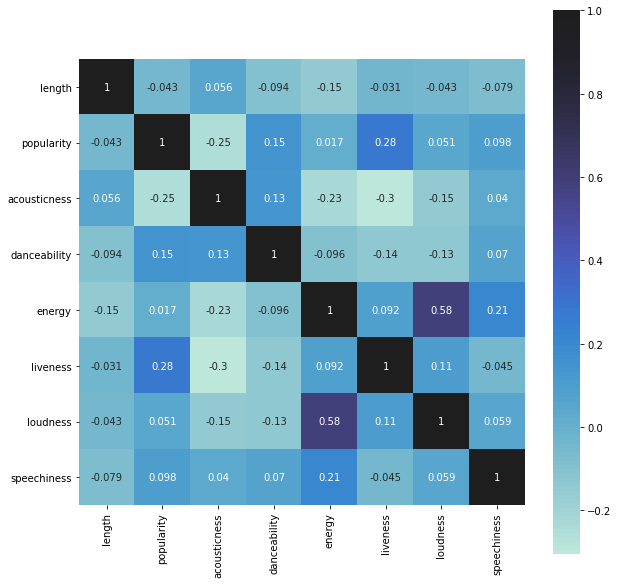

In [26]:
cor =data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,
            square=True,
            annot=True,
            center=True)

Text(0.5, 1.0, 'Relación energy y loudness')

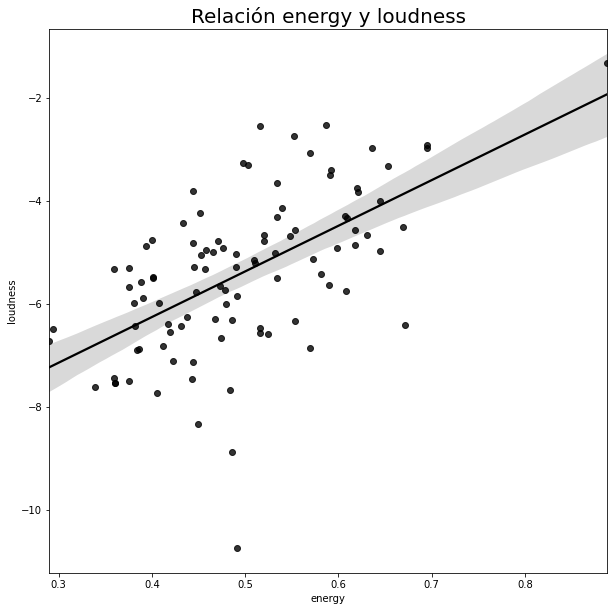

In [27]:
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='energy',
            y='loudness',
            data=data,color='black')
plt.title('Relación energy y loudness',fontsize = 20)

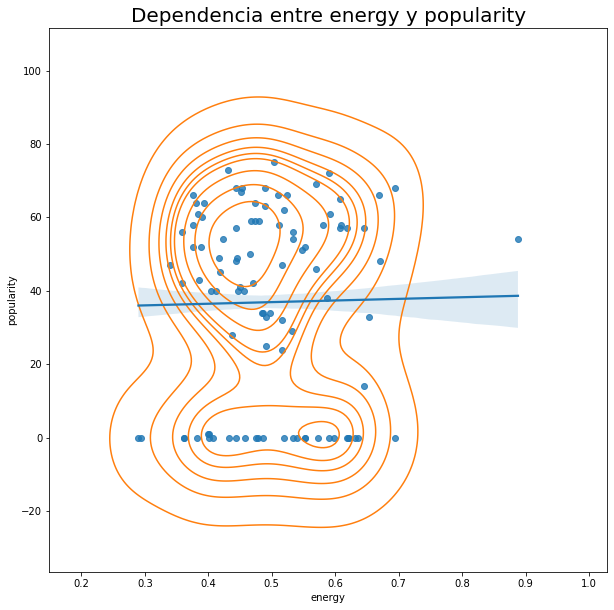

In [28]:
fig=plt.subplots(figsize=(10,10))
plt.title('Dependencia entre energy y popularity', fontsize=20)
sns.regplot(x='energy', y='popularity',
            ci=50, data=data, )
sns.kdeplot(data.energy,data.popularity)

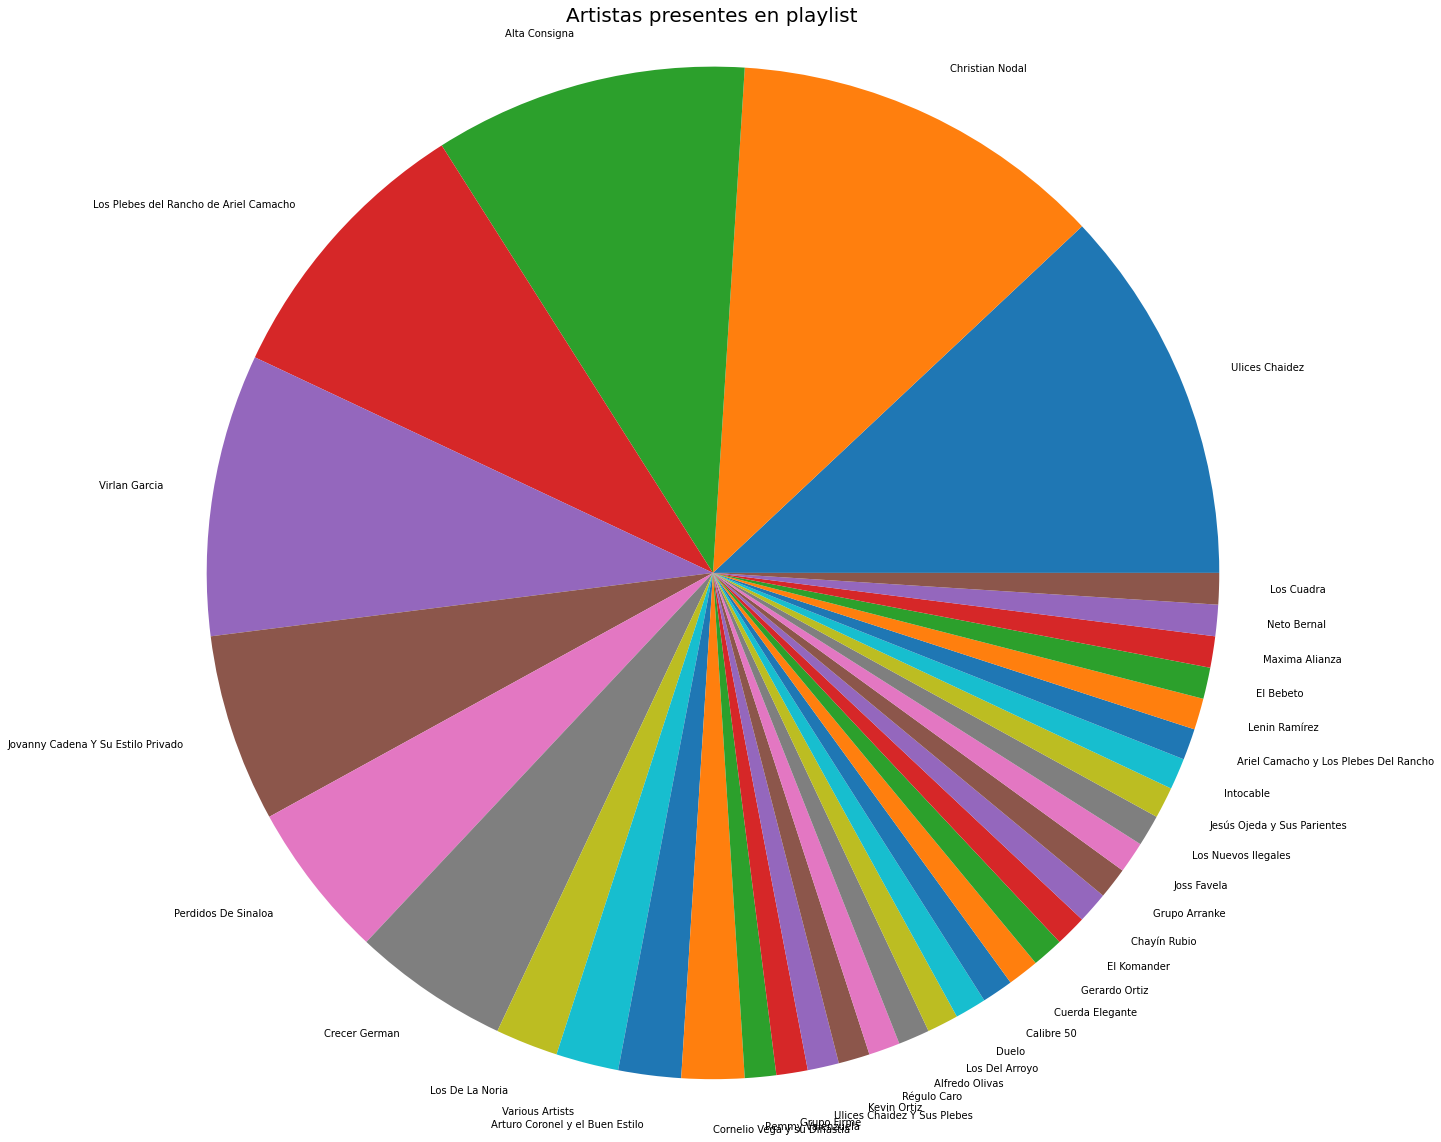

In [29]:
labels = data.artist.value_counts().index
sizes = data.artist.value_counts().values
plt.figure(figsize = (20,20))
plt.pie(sizes, labels=labels)
autopct=('%1.1f%%')
plt.axis('equal')
plt.title('Artistas presentes en playlist', fontsize=20)
plt.show()

#Análisis por fecha

In [30]:
data['fecha'] = pd.to_datetime(data['release_date'])
data['Year'] = data['fecha'].dt.year            
data['month'] = data['fecha'].dt.month 

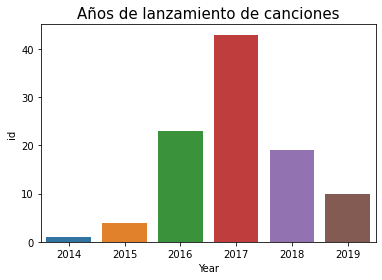

In [31]:
year_release = data.groupby(['Year']).count()
plt.title('Años de lanzamiento de canciones', fontsize=15)
sns.barplot(x = year_release.index,
            y=year_release.id)

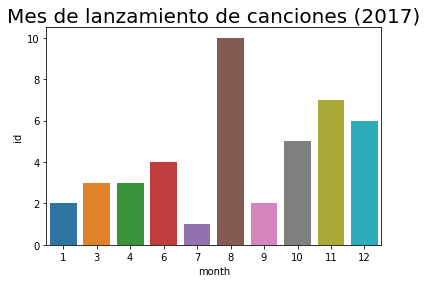

In [32]:
months_2017 = data[data['Year'] == 2017].groupby(['month']).count()
plt.title('Mes de lanzamiento de canciones (2017)', fontsize=20)
sns.barplot(x= months_2017.index,
            y=months_2017.id)

In [33]:
df_2017 = data[data['Year'] == 2017]
artistas = df_2017.artist.value_counts().head(5)
print('Artistas mas frecuentes del 2017\n')
for i in artistas.index:
  print('->', i)

Artistas mas frecuentes del 2017

-> Christian Nodal
-> Ulices Chaidez
-> Alta Consigna
-> Jovanny Cadena Y Su Estilo Privado
-> Virlan Garcia


In [34]:
print(' ~ Danceability promedio: {}'.format(df_2017.danceability.mean()))
print(' ~ Energy promedio: {}'.format(df_2017.energy.mean()))
print(' ~ Loudness promedio: {}'.format(df_2017.loudness.mean()))
print(' ~ Acousticness promedio: {}'.format(df_2017.acousticness.mean()))
print(' ~ Liveness promedio: {}'.format(df_2017.liveness.mean()))

 ~ Danceability promedio: 0.639279069767442
 ~ Energy promedio: 0.48595348837209307
 ~ Loudness promedio: -5.405581395348837
 ~ Acousticness promedio: 0.5524534883720931
 ~ Liveness promedio: 0.15296976744186044


In [35]:
populares = df_2017.sort_values(by='popularity', ascending=False).head(10)
print('Canciones más populares del 2017\n')
for i in populares.name:
  print('->', i)

Canciones más populares del 2017

-> Adiós Amor
-> Probablemente
-> Te Fallé
-> A Través Del Vaso
-> En Definitiva
-> Me Dejé Llevar
-> No Me Hubiera Enamorado
-> Eres
-> Te Voy A Olvidar
-> Que Bonito Es Querer


In [36]:
no_populares = df_2017.sort_values(by='popularity', ascending=False).tail(10)
print('Canciones menos populares del 2017\n')
for i in no_populares.name:
  print('->', i)

Canciones menos populares del 2017

-> Ya Me Enteré
-> Nadie Como Tú
-> Te Regalo
-> Mentiras
-> Antologia
-> Aunque El Mundo Se Oponga
-> No Te Enamores Más
-> Voy Amarte Hoy
-> Mi Vida Eres Tú
-> No La Hagas Sufrir


In [37]:
#Popularidad de canciones por año
year_popularity = pd.DataFrame(data.groupby('Year')['popularity'].mean())
year_popularity.sort_values(by=['popularity'], ascending=False)

,popularity
Year,
2019,47.200000
2014,42.000000
2017,39.232558
2016,35.521739
2018,29.473684
2015,28.250000


Text(0.5, 1.0, 'Popularidad de canciones por año')

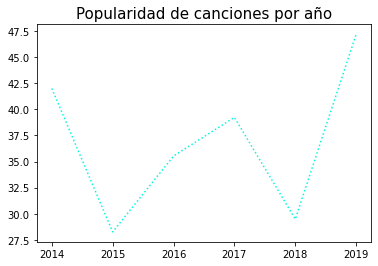

In [38]:
plt.plot(year_popularity['popularity'],
         color='#04F7E1',
         linestyle=':',)
plt.title('Popularidad de canciones por año',fontsize=15)

In [39]:
#Energia promedio de canciones por años
year_energy = pd.DataFrame(data.groupby('Year')['energy'].mean())
year_energy.sort_values(by=['energy'], ascending=False)

,energy
Year,
2018,0.577105
2015,0.541250
2019,0.494700
2017,0.485953
2014,0.471000
2016,0.446739


Text(0.5, 1.0, 'Energia de canciones por años')

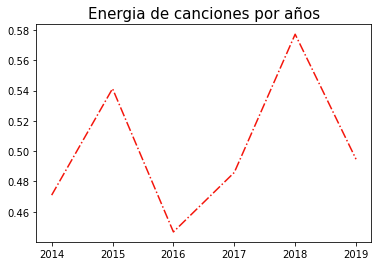

In [40]:
plt.plot(year_energy['energy'],
         color='#F4160C',
         linestyle='dashdot')
plt.title('Energia de canciones por años',fontsize=15)

In [41]:
#Años con canciones mas bailables
year_danceability = pd.DataFrame(data.groupby('Year')['danceability'].mean())
year_danceability.sort_values(by=['danceability'], ascending=False)

,danceability
Year,
2014,0.751000
2019,0.654100
2016,0.646565
2018,0.644737
2017,0.639279
2015,0.610500


Text(0.5, 1.0, 'Años con canciones más bailables')

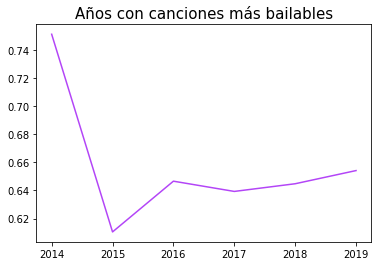

In [42]:
plt.plot(year_danceability['danceability'],
         color='#B345F7')
plt.title('Años con canciones más bailables',fontsize=15)

In [43]:
#Años con canciones mas alegres
year_liveness = pd.DataFrame(data.groupby('Year')['liveness'].mean())
year_liveness.sort_values(by=['liveness'], ascending=False)

,liveness
Year,
2019,0.165840
2015,0.163500
2018,0.154568
2017,0.152970
2016,0.132004
2014,0.089300


Text(0.5, 1.0, 'Años con canciones mas alegres')

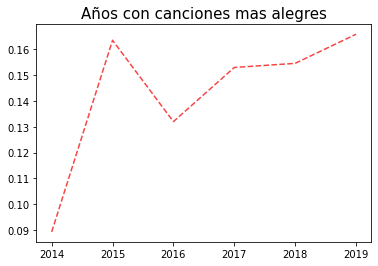

In [44]:
plt.plot(year_liveness['liveness'],
         color='#F74545',
         linestyle='--')
plt.title('Años con canciones mas alegres',fontsize=15)